In [1]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
corpus = [
    "Very good course!!!",
    "The teacher is really good.",
    "The teacher and the course are very good."
]

def normalize(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()                            #Making everything lowercase
    text = word_tokenize(text)                     #Tokenizing the text
    text = [x for x in text if not x in stopwords] #Removing the stopwords from the sentences
    text = [x for x in text if x.isalnum()]        #Removing punctuations and exclamations. 
                                                   #Should be critical when normalizing, as it removes some information about the language
    text = [stem.stem(x) for x in text]            #Stemming the sentences
    return text

sentences = [] #Creating and empty list for storing the normalized sentences

for i in range(len(corpus)): #Looping through the corpus and creating normalized sentences
    sentences.append(normalize(corpus[i]))

print(sentences[2])

['teacher', 'cours', 'good']


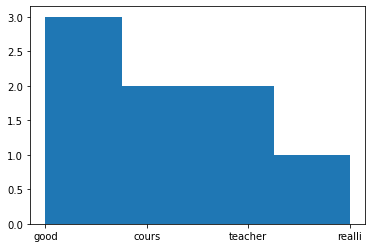

['good', 'cours', 'teacher', 'realli', 'good', 'teacher', 'cours', 'good']
{'realli', 'teacher', 'good', 'cours'}


In [3]:
sentGram = [] #Empty list for storing all the words in the corpus when creating a histogram

for i in range(len(sentences)):
    sentGram += sentences[i] #Appending the list with words to the previous mentioned list

withoutDup = set(sentGram)   #Getting the list without duplicates to determine number of bins for the histogram

plt.hist(sentGram, len(withoutDup))
plt.show()
print(sentGram)
print(withoutDup)


In [4]:
dicts = [] #Occurences of each word in the sentences compared to the whole corpus
for i in range(len(sentences)): #Going through the length of each sentence
    dicts.append(dict.fromkeys(withoutDup, 0)) #Appending an entry with count of words in corpus
    for word in sentences[i]: #Filling this entry up with words from sentences and their occurence
        dicts[i][word]+=1

for i in range(len(dicts)): #Just printing out a simple frequency vector
    print("sentence ", i+1)
    print(dicts[i])
    print("\n")


print(sentences[0])
print(dicts[0])

print(sentences[1])
print(dicts[1])

print(sentences[2])
print(dicts[2])

sentence  1
{'realli': 0, 'teacher': 0, 'good': 1, 'cours': 1}


sentence  2
{'realli': 1, 'teacher': 1, 'good': 1, 'cours': 0}


sentence  3
{'realli': 0, 'teacher': 1, 'good': 1, 'cours': 1}


['good', 'cours']
{'realli': 0, 'teacher': 0, 'good': 1, 'cours': 1}
['teacher', 'realli', 'good']
{'realli': 1, 'teacher': 1, 'good': 1, 'cours': 0}
['teacher', 'cours', 'good']
{'realli': 0, 'teacher': 1, 'good': 1, 'cours': 1}


In [5]:
#This function computes the term frequency 
def termFrequency(dict, sentence): #Used some slight inspiration from https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/ here
    tf = {} #Creating empty key value store
    for word, num in dict.items(): #Iterating through the key-value pair of words and occurences
        tf[word] = num/float(len(sentence)) #Adding entry as occurence divided by length of sentence
    return tf

In [6]:
#tfSentence0 = termFrequency(dicts[0], sentences[0])
#print(tfSentence0)

tfSentences = [] #Empty list for storing the term frequency key values
for i in range(len(dicts)):
    print("Term frequency of sentence ",i+1)
    tfSentence = termFrequency(dicts[i], sentences[i]) #Sending the sentence with dictionary to my function
    tfSentences.append(tfSentence) 
    print(tfSentences[i])
    print("\n")


Term frequency of sentence  1
{'realli': 0.0, 'teacher': 0.0, 'good': 0.5, 'cours': 0.5}


Term frequency of sentence  2
{'realli': 0.3333333333333333, 'teacher': 0.3333333333333333, 'good': 0.3333333333333333, 'cours': 0.0}


Term frequency of sentence  3
{'realli': 0.0, 'teacher': 0.3333333333333333, 'good': 0.3333333333333333, 'cours': 0.3333333333333333}




In [23]:
def calcIdf(dictList): #Inspiration from https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/ here
    idf = {} #Creating an empty store for the idf values with corresponding keys

    idf = dict.fromkeys(dictList[0].keys(), 0) #Adding all the words as keys from the dicts, but adding zero as the value to all the entries
    for dic in dictList: #Going through each of the dicts in the list
        for word, val in dic.items(): #For every key value pair in one of the dict lists 
            if val > 0:
                idf[word] += 1       #Add if value is 1
    print(len(dictList))
    for word, val in idf.items(): #For every key value pair
        idf[word] = math.log(len(dictList) / float(val)) # Calculating the IDF score 

    return idf

idfScores = calcIdf(dicts)
print(" IDF SCORES:\n", idfScores)


3
 IDF SCORES:
 {'realli': 1.0986122886681098, 'teacher': 0.4054651081081644, 'good': 0.0, 'cours': 0.4054651081081644}


In [25]:
def calcTfIdf(sentenceTf, idf): #Inspiration from https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/
    tfidf = {} #Creating empty key value pair
    for word, num in sentenceTf.items(): #For ever key value
        tfidf[word] = num*idf[word]      #Calculating tf*idf
    return tfidf

In [31]:
tfidfs = []

for i in range(len(tfSentences)):
    tfidfs.append(calcTfIdf(tfSentences[i], idfScores))
    print("TF*IDF score of sentence ",i+1, " \n", tfidfs[i], "\n")

TF*IDF score of sentence  1  
 {'realli': 0.0, 'teacher': 0.0, 'good': 0.0, 'cours': 0.2027325540540822} 

TF*IDF score of sentence  2  
 {'realli': 0.3662040962227032, 'teacher': 0.13515503603605478, 'good': 0.0, 'cours': 0.0} 

TF*IDF score of sentence  3  
 {'realli': 0.0, 'teacher': 0.13515503603605478, 'good': 0.0, 'cours': 0.13515503603605478} 



In [ ]:
'''
One of the advantages of using tf is that this approach describes the context
by considering the frequency of tokens, and that you can find similarities between different documents rather easy.

Tf*idf also describes the relative rareness of the tokens compared to other documents in the corpus.

Disadvantages of this model is that it might be slow when the vocabulary is large because it is computed in the word count space.
Semantic similarities are not considered, unlike with word embeddings for example.
'''